## Clustering Art

In this little project I'll use k-means clustering to swap colors between two paintings by Austrian artist [Jonas Geise.](https://www.galerievonier.com/artists/jonas-geise/)

Steps to do this:
1. Read image file and reshape it from three (height, width, colors) to two dimensions (height*width, colors)
2. Find ten dominat colors by means of k-means clustering
3. Get the rgb codes of the cluster centers (which represent the mean rgb color of each cluster)
4. Read the second image and reshape it like the first one
5. Find ten color clusters with the same k-means model
6. Assign the first image's dominant rgb color codes to the ten clusters of the second image
7. Voila!

The first part closely follows the k-means section of [Jose Portilla's](https://www.linkedin.com/in/jmportilla/) Udemy course on [machine learning with scikit learn](https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/).





In [6]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

### 1. Read image file and reshape it from three (height, width, colors) to two dimensions (height*width, colors). Below you see the original painting.

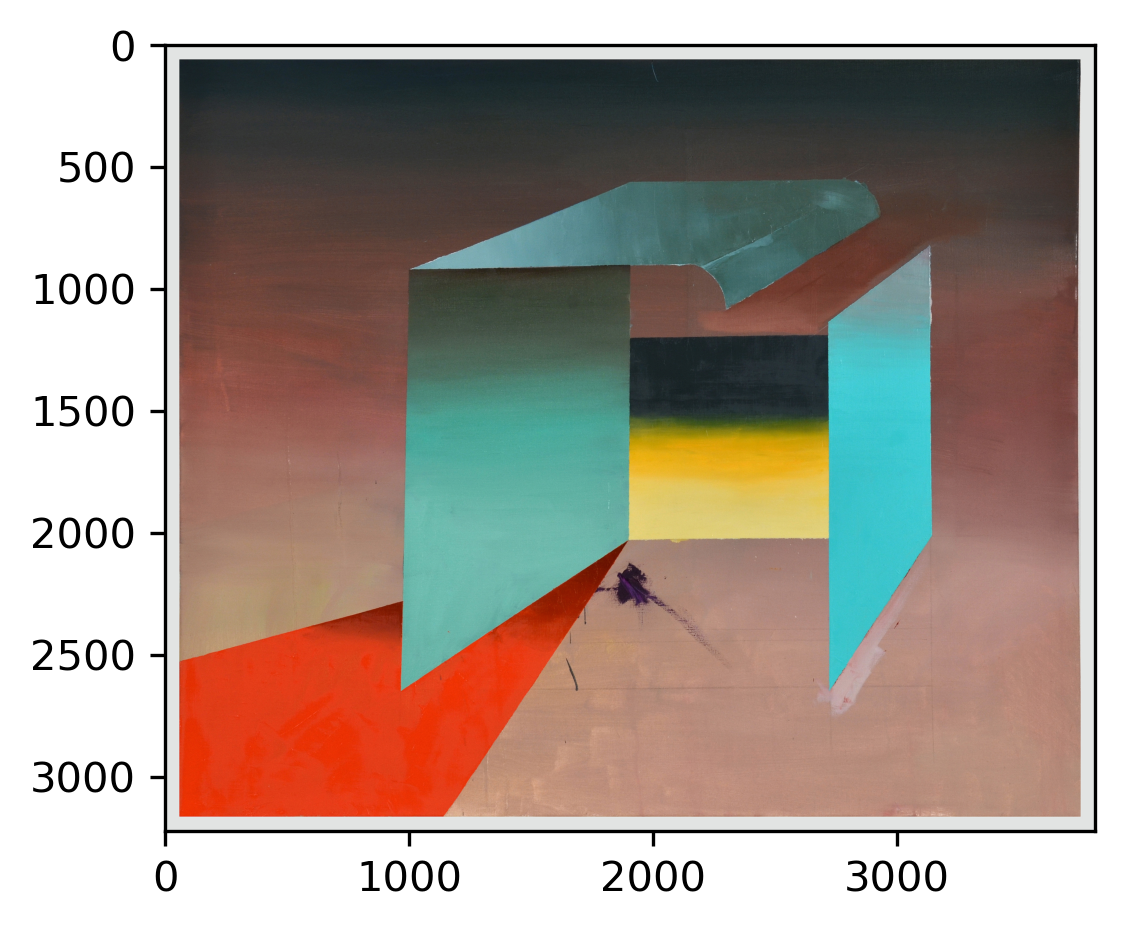

In [7]:
image_as_array = mpimg.imread('jonas.jpeg')
plt.figure(figsize=(4,4),dpi=300)
plt.imshow(image_as_array);

(h,w,c) = image_as_array.shape
image_as_array2d = image_as_array.reshape(h*w,c)

2. Find ten dominat colors by means of k-means clustering


In [8]:
model = KMeans(n_clusters=10)
labels = model.fit_predict(image_as_array2d) # since the image is quite large this might take a few minutes

3. Get the rgb codes of the cluster centers (which represent the mean rgb color of each cluster)


In [9]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

That's how the first painting looks after color quantisation, reduced to ten colors.

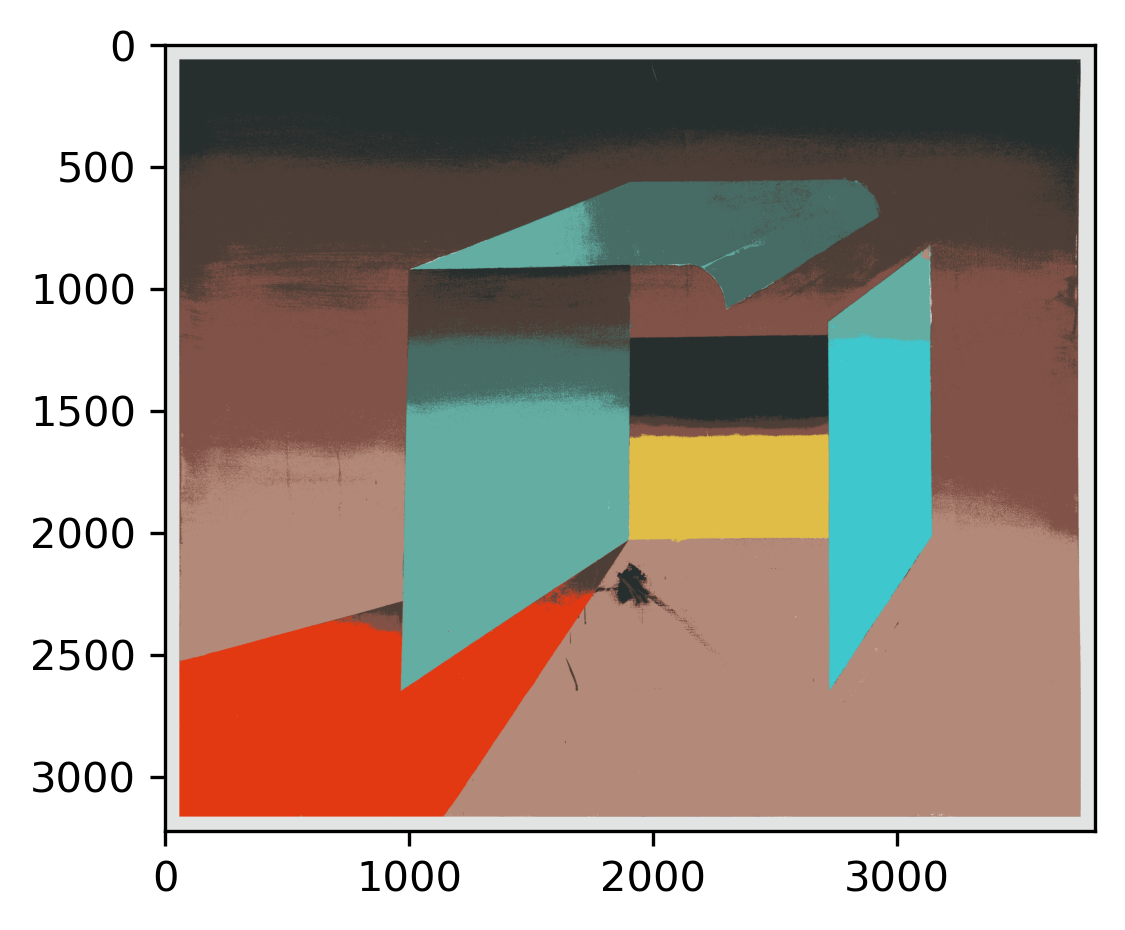

In [11]:
quantised_image = np.reshape(rgb_codes[labels], (h, w, c))

plt.figure(figsize=(4,4),dpi=300)
plt.imshow(quantised_image);
plt.savefig('jonas_quantised.jpeg');

4. Read the second image and reshape it like the first one. Below you see the original painting.

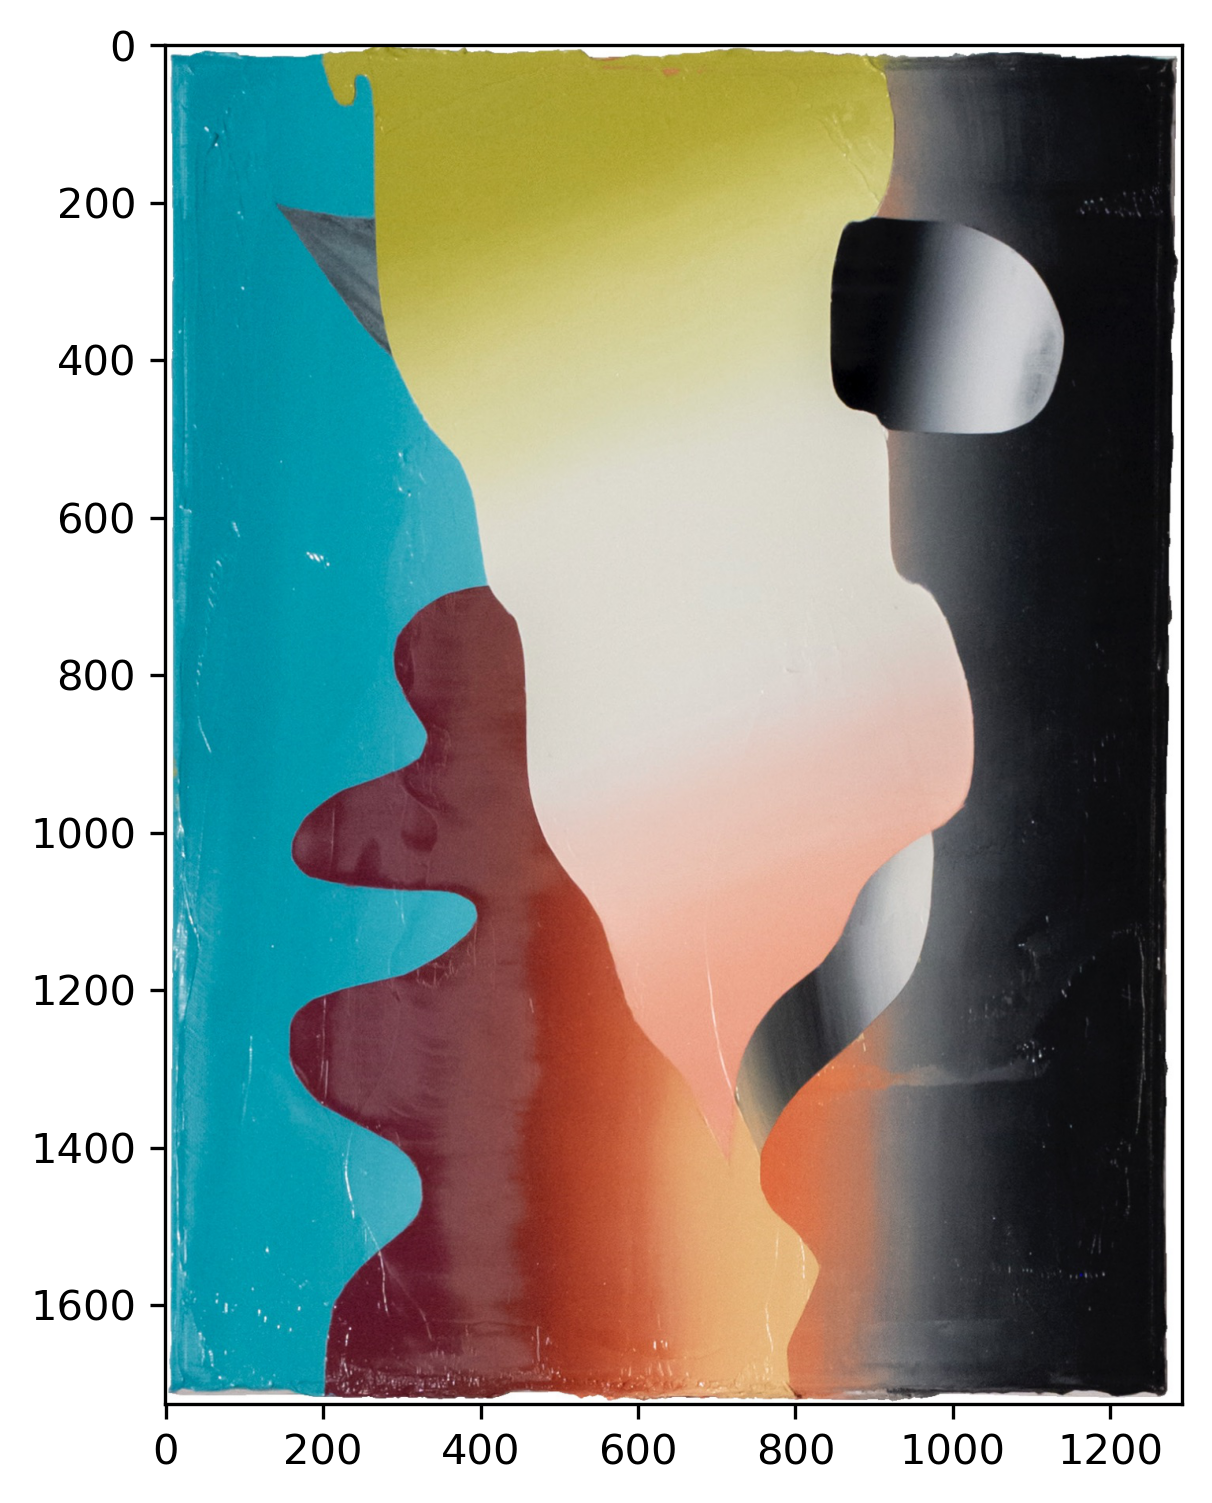

In [12]:
image_as_array2 = mpimg.imread('jonas2.jpg')
plt.figure(figsize=(6,6),dpi=300)
plt.imshow(image_as_array2);

(h,w,c) = image_as_array2.shape
image_as_array2_2d = image_as_array2.reshape(h*w,c)

5. Find ten color clusters with the same k-means model

In [16]:
labels2 = model.fit_predict(image_as_array2_2d)

6. Assign the first image's dominant rgb color codes to the ten clusters of the second image


In [17]:
quantised_image2 = np.reshape(rgb_codes[labels2], (h, w, c))

7. Voilà!

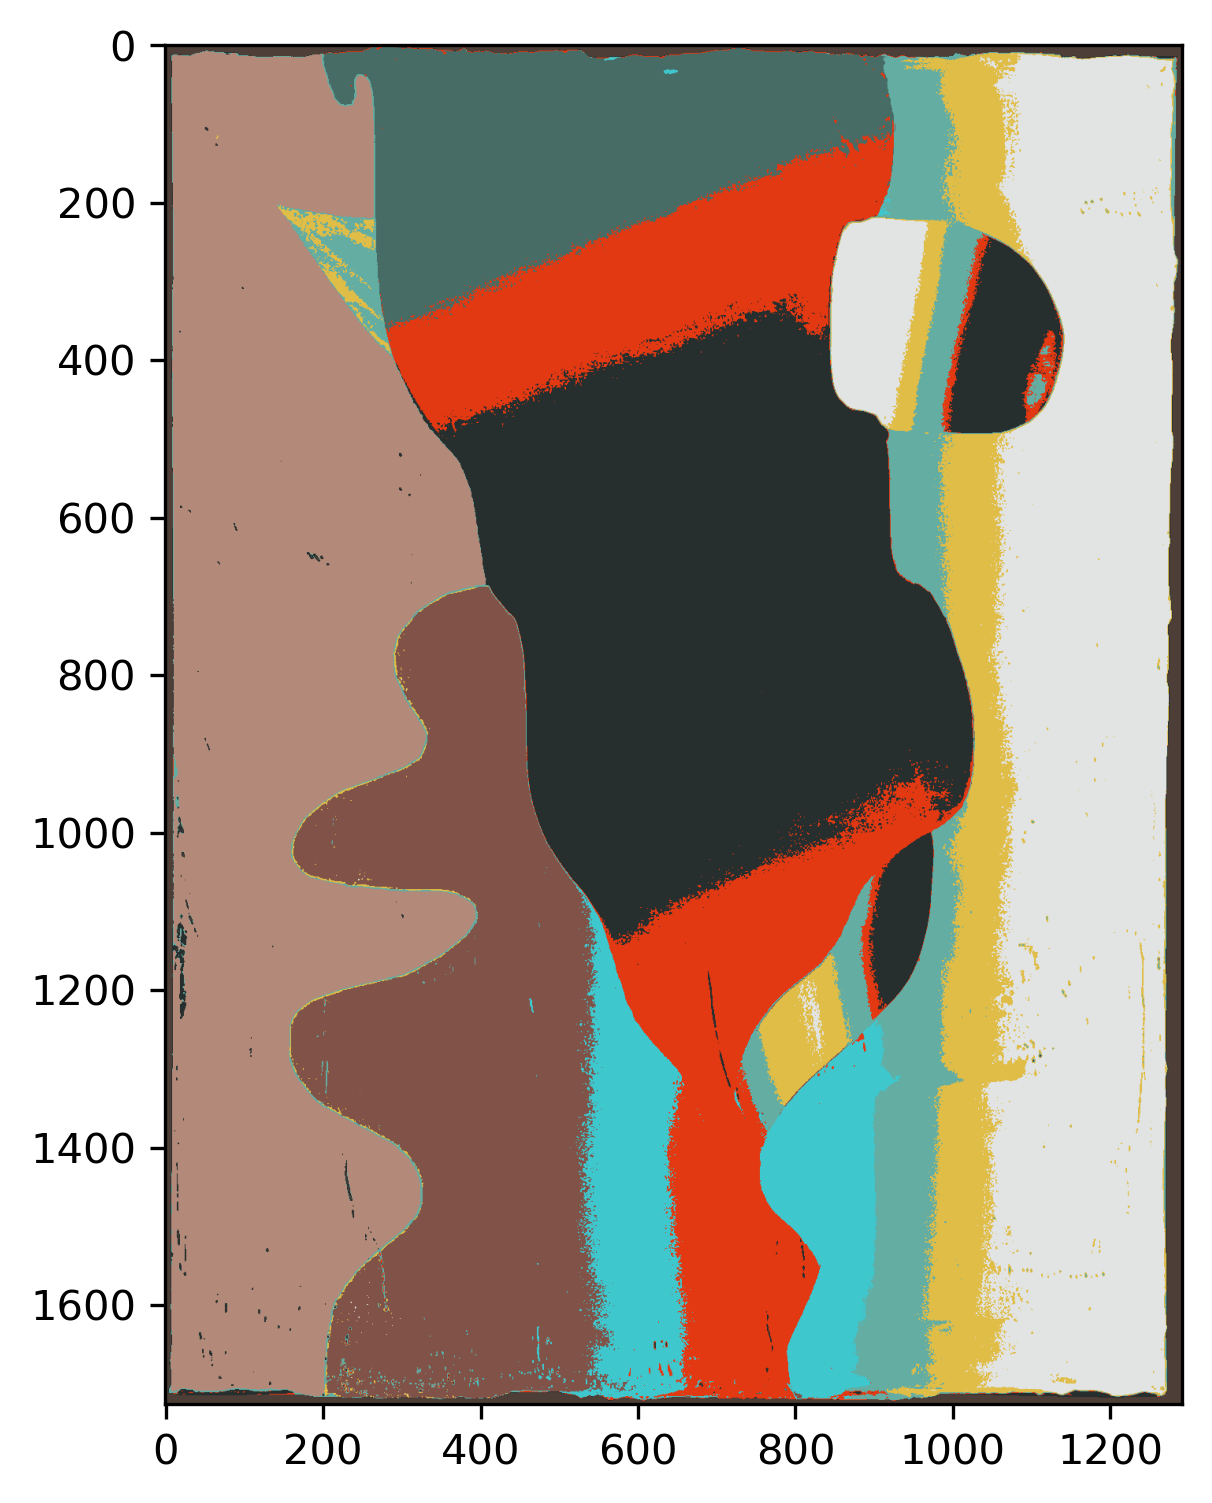

In [18]:
# note that there's no random state set, so it's gonna look different every time
plt.figure(figsize=(6,6),dpi=300)
plt.imshow(quantised_image2);
plt.savefig('jonas_quantised2.jpeg');
